<a href="https://colab.research.google.com/github/ShihanZENG/Awesome-DSDO/blob/main/Copy_of_Assignment_for_KNN_manchine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA)

In [ ]:
# Import necessary libraries for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for model building, scaling, grid search, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')


Data Preparation

Dealing with Missing Data.

Dealing with Categorical Data  

Dealing with Duplicated Data

Partitioning a dataset into separate training and test sets.

Rescaling Data.

Standardization.

Normalization.

Binarization.

Feature Selection and Feature Extraction

Data Cleaning and Preprocessing

In [ ]:
import pandas as pd

# Reading Excel data
df = pd.read_excel('DSML PMA Dataset2425.xlsx', sheet_name='Apps')

# Make sure it's a DataFrame
df = pd.DataFrame(df)

Dealing with Rating Missing Data.

In [ ]:
# missing data in Rating
print("missing ---------- data")
df = df.dropna(subset=['Rating'])
print(df.isnull().sum())

missing ---------- data
App                1
Category          13
Rating             0
Reviews            3
Size               6
Installs          12
Type               7
Price              0
Content Rating     5
Genres             7
Last Updated       4
Current Ver        7
Android Ver        8
dtype: int64


Imputing missing value

In [ ]:
# Handling of outliers
df.drop(df[df['Rating'] > 5].index, inplace=True)
# Fill in missing values
df.loc[(df['Price'] != 0) & (df['Type'].isnull()), 'Type'] = 'Paid'
df.loc[(df['Price'] == 0) & (df['Type'].isnull()), 'Type'] = 'Free'
# Convert the target variable
df['Type'] = df['Type'].map({'Free': 0, 'Paid': 1})
# 转换 Rating 为二分类标签（高评分 >= 4.0 -> 1, 低评分 < 4.0 -> 0）
df['Rating'] = np.where(df['Rating'] >= 4.0, 1, 0)
print(df.isnull().sum())

App                1
Category          13
Rating             0
Reviews            3
Size               6
Installs          12
Type               0
Price              0
Content Rating     4
Genres             7
Last Updated       4
Current Ver        7
Android Ver        7
dtype: int64


Dealing with Duplicated Data

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

,count
False,8906


分析Category为空的值

Category为空的一些数据有重复行，也就是这行数据是被重复的，只是缺少了Category的值，我通过Excel的筛选可以看出，比如AAFP除了缺失的数据其他是一样的，所以将它删除,有的缺失值就对应这一个App,所以这些数据不是很重要，处理的方式是直接删除。

In [ ]:
# Handle NaNs to ensure that rows with empty `Category` are correctly identified
df['Category'].fillna('', inplace=True)

# Find rows where `Category` is empty
category_missing = df[df['Category'] == '']

# Get a list of `Apps` with an empty `Category`.
missing_apps = category_missing['App'].unique()

# Find the `App` in the big table `df` that also appears in `category_missing`.
matching_apps_in_df = df[df['App'].isin(missing_apps)]

# Sort by `App` so that identical `Apps` are listed together!
matching_apps_in_df = matching_apps_in_df.sort_values(by=['App'])

# print out the value
print("\n📌 `Category` 为空的 `App`，同时在大表中也存在：")
print(matching_apps_in_df)
# 处理结果
df = df.dropna(subset=['Category'])
print(df.isnull().sum())


📌 `Category` 为空的 `App`，同时在大表中也存在：
                                                     App       Category  \
2515                                                AAFP                  
10768                                               AAFP        MEDICAL   
250                                      AdWords Express                  
279                                      AdWords Express       BUSINESS   
2936   Adobe Photoshop Express:Photo Editor Collage M...    PHOTOGRAPHY   
2814   Adobe Photoshop Express:Photo Editor Collage M...                  
6590                            Blood Pressure(BP) Diary        MEDICAL   
2510                            Blood Pressure(BP) Diary                  
2626                           Couple - Relationship App                  
2652                           Couple - Relationship App         SOCIAL   
1187                                     Debonairs Pizza                  
769                                   GMAT Question Bank         

接下来将讨论Content Rating的空值，通过观察excel可以看出

In [ ]:
import pandas as pd
# Remove spaces to avoid misclassification
df['Content Rating'] = df['Content Rating'].str.strip()
# Find rows with empty Content Rating
CR_missing_rows = df[df['Content Rating'] == '']
print("\n Content Rating` for empty rows：")
print(CR_missing_rows)

# By looking at the rows of excel `Unrated` there are only two rows, which have little effect on the training data, and the treatment is deleted.
CR_unrated_rows = df[df['Content Rating'] == 'Unrated']
print(CR_unrated_rows)

# Removing Unrated Rows and Null Values
df = df[df['Content Rating'] != 'Unrated']
df = df.dropna(subset=['Content Rating'])
print(df.isnull().sum())
print(df['Content Rating'].value_counts())




 Content Rating` for empty rows：
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []
                         App Category  Rating Reviews  Size Installs  Type  \
8266  DC Universe Online Map    TOOLS       1    1186  6.4M  50,000+     0   

     Price Content Rating Genres       Last Updated Current Ver   Android Ver  
8266     0        Unrated  Tools  February 27, 2012         1.3  2.3.3 and up  
App                1
Category           0
Rating             0
Reviews            3
Size               6
Installs          12
Type               0
Price              0
Content Rating     0
Genres             6
Last Updated       4
Current Ver        7
Android Ver        7
dtype: int64
Content Rating
Everyone           7105
Teen               1023
Mature 17+          410
Everyone 10+        360
Adults only 18+       3
Name: count, dtype: int64


接下来我将对数值型变量（Reviews，Installs,Price去掉符号，转换成浮点数或者整数。并且对Review和Installs的缺失值用众数进行填充，并且直接删除APP中的一个缺失值和Genres中的6个缺失值，并且删除对Rating影响不大的列（Last Updated，Current Ver ，Android Ver, Size)         

In [ ]:
# # delate the row with missing value
df = df.dropna(subset=['App','Installs','Genres','Last Updated','Current Ver','Android Ver','Size','Reviews'])
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [ ]:
print(df.dtypes)

App               object
Category          object
Rating             int64
Reviews           object
Size              object
Installs          object
Type               int64
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object


In [ ]:
to_excel = df.to_excel('data.xlsx')

In [ ]:
# Price去掉`$`并且转换成float，并且删除Size, Current Ver 和Android Ver列
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace('$', '', regex=False)
# Reviews去掉逗号并且转换成float
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
field_list = ['Reviews', 'Price', 'Installs', 'Type']
# Convert to float
for field in field_list:
    df[field] = df[field].astype(float)
# Let’s tidy this up by dropping the Size, Current Ver and ndroid Ver column
df = df.drop(['Size','Current Ver','Android Ver'], axis=1)
print(df.dtypes)

App                object
Category           object
Rating              int64
Reviews           float64
Installs          float64
Type              float64
Price             float64
Content Rating     object
Genres             object
Last Updated       object
dtype: object


In [ ]:

# Display basic information about the dataset
print("\nData Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values. (Note: Many rows may have missing Customer ID.)
print("\nMissing values per column:")
print(df.isnull().sum())



Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 8855 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8855 non-null   object 
 1   Category        8855 non-null   object 
 2   Rating          8855 non-null   int64  
 3   Reviews         8855 non-null   float64
 4   Installs        8855 non-null   float64
 5   Type            8855 non-null   float64
 6   Price           8855 non-null   float64
 7   Content Rating  8855 non-null   object 
 8   Genres          8855 non-null   object 
 9   Last Updated    8855 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 761.0+ KB
None

Summary Statistics:
            Rating       Reviews      Installs         Type        Price
count  8855.000000  8.855000e+03  8.855000e+03  8855.000000  8855.000000
mean      0.780915  4.739690e+05  1.654273e+07     0.068436     0.963743
std       0.413650  2.910471e

Mapping Nominal Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Identify categorical features.
categorical_cols = ['App', 'Category', 'Last Updated', 'Content Rating', 'Genres']
# One-hot encode categorical features.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nEncoded dataset shape:", df_encoded.shape)
print(df_encoded.head())


Encoded dataset shape: (8855, 9611)
   Rating   Reviews    Installs  Type  Price  App_.R  App_/u/app  App_058.ba  \
0       1     159.0     10000.0   0.0    0.0   False       False       False   
1       0     967.0    500000.0   0.0    0.0   False       False       False   
2       1   87510.0   5000000.0   0.0    0.0   False       False       False   
3       1  215644.0  50000000.0   0.0    0.0   False       False       False   
4       1     967.0    100000.0   0.0    0.0   False       False       False   

   App_1. FC KÃ¶ln App  App_10 Best Foods for You  ...  Genres_Tools  \
0                False                      False  ...         False   
1                False                      False  ...         False   
2                False                      False  ...         False   
3                False                      False  ...         False   
4                False                      False  ...         False   

   Genres_Tools;Education  Genres_Travel & Local 

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# df['App'] = df['App'].str.lower()
# rating_agg = df.groupby(['App', 'Category']).agg({
#     'Type': 'first',
#     'Content Rating': 'first',
#     'Genres': 'first',
#     'Rating': 'max',
#     'Installs': 'max',
#     'Reviews': 'median',
# }).reset_index()
# data_model = rating_agg[['Type', 'Content Rating', 'Genres', 'Rating', 'Reviews', 'Installs']]

In [ ]:
# 2. Train-Test Split
# ---------------------------------------------------

# Separate features and target.
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

from imblearn.over_sampling import SMOTE

# Split the data (80% train, 20% test) with stratification to preserve class proportions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
# PAC
from sklearn.decomposition import PCA                                                       # 3. 降维（PCA，减少 KNN 计算量）
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# 4. 归一化（KNN 需要归一化）
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_pca)
X_test_knn_scaled = scaler_knn.transform(X_test_pca)

In [ ]:
print("\n-----KNN IMPLEMENTAION (Separate Steps)--")
# Step 1: Data Scaling for KNN.

scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train)
X_test_knn_scaled = scaler_knn.transform(X_test)
# Step 2: Define the KNN classifier.
knn = KNeighborsClassifier()
# Step 3: Set up the hyperparameter grid for KNN.
param_grid_knn = {
    'n_neighbors': list(range(5, 11)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Step 4: Set up GridSearchCV for hyperparameter tuning.
grid_knn = GridSearchCV(knn, param_grid=param_grid_knn,
                        cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_knn.fit(X_train_knn_scaled, y_train)

print("\n--- KNN Results ---")
print("Best KNN parameters:", grid_knn.best_params_)
print("Best cross-validation accuracy for KNN: {:.4f}".format(grid_knn.best_score_))


-----KNN IMPLEMENTAION (Separate Steps)--
Fitting 3 folds for each of 24 candidates, totalling 72 fits

--- KNN Results ---
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.7864



Confusion Matrix for KNN:
[[   8  380]
 [   0 1383]]
cm_knn:

Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       388
           1       0.78      1.00      0.88      1383

    accuracy                           0.79      1771
   macro avg       0.89      0.51      0.46      1771
weighted avg       0.83      0.79      0.70      1771



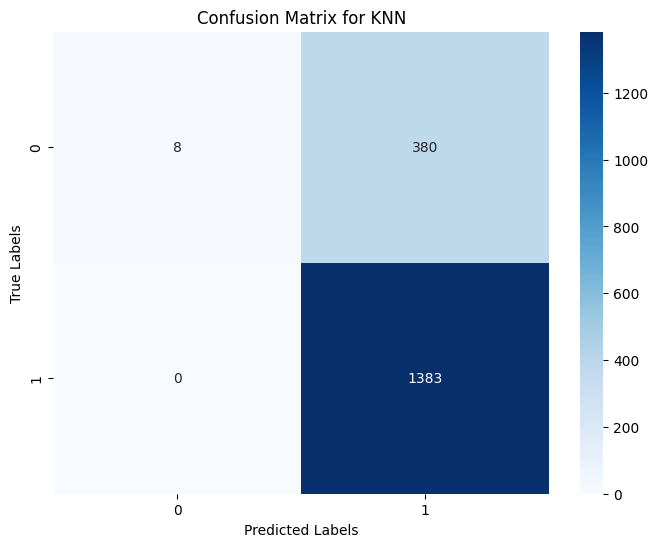

In [ ]:
# Evaluation the final KNN model on the test data
y_pred_knn = grid_knn.predict(X_test_knn_scaled)
print("\nConfusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print("cm_knn:")
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))
# Plot the cpnfusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()